# Pel√≠culas y Series de Netflix (EDA)

---



### Definicion:
 Netflix es una de las plataformas de streaming de v√≠deo y medios m√°s populares. Ofrece m√°s de 8000 pel√≠culas y series de televisi√≥n y, a mediados de 2021, contaba con m√°s de 200 millones de suscriptores en todo el mundo. Este conjunto de datos tabular contiene listas de todas las pel√≠culas y series de televisi√≥n disponibles en Netflix, junto con detalles como reparto, directores, audiencia, a√±o de estreno, duraci√≥n, etc.

### Objetivo
Realizar un an√°lisis exploratorio de datos (EDA) de la plataforma de streaming Netflix, a partir de un conjunto de datos que incluye informaci√≥n sobre pel√≠culas y series disponibles, con el fin de identificar tendencias, patrones de lanzamiento y caracter√≠sticas relevantes del contenido. Para ello, se aplicar√°n herramientas estad√≠sticas y visualizaciones gr√°ficas que faciliten la interpretaci√≥n de los resultados y permitan obtener una visi√≥n m√°s clara sobre la evoluci√≥n del cat√°logo y las preferencias de los usuarios.

| **Nombre de la columna** | **Descripci√≥n**                                                                                     |
| ------------------------ | --------------------------------------------------------------------------------------------------- |
| `show_id`                | Identificador √∫nico para cada pel√≠cula o programa de televisi√≥n.                                    |
| `type`                   | Especifica si el contenido es una pel√≠cula o una serie.                                             |
| `title`                  | T√≠tulo o nombre del contenido.                                                                      |
| `director`               | Nombre(s) del(los) director(es) del contenido.                                                      |
| `cast`                   | Lista de actores que participan en el contenido.                                                    |
| `country`                | Pa√≠s de origen donde se produjo el contenido.                                                       |
| `date_added`             | Fecha en que el contenido fue a√±adido a Netflix.                                                    |
| `release_year`           | A√±o en que el contenido fue originalmente lanzado.                                                  |
| `rating`                 | Clasificaci√≥n del contenido (por ejemplo, TV-MA, PG-13), que indica la idoneidad para la audiencia. |
| `duration`               | Duraci√≥n de las pel√≠culas en minutos o n√∫mero de temporadas para las series.                        |
| `listed_in`              | Categor√≠as o g√©neros a los que pertenece el contenido (por ejemplo, Drama, Comedia, Acci√≥n).        |
| `description`            | Breve resumen o sinopsis del contenido.                                                             |


### Data optenido:
Kaggle: Pagina web
https://www.kaggle.com/datasets/shivamb/netflix-shows/data

#‚öôÔ∏è 1. Preparar el entorno de trabajo

In [ ]:
# Instalacion de las librerias
!pip install squarify
import squarify
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



#üì• 2. Recolectar y cargar los datos

In [ ]:
neflix = pd.read_csv('/content/netflix_titles.csv')
neflix.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

#üßπ 3. Limpieza de datos (Data Cleaning)

In [ ]:
# Filas y columnas en la data
print(neflix.shape)

(8807, 12)


In [ ]:
# La cantidad de filas por data y el tipo de dato
print(neflix.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [ ]:
# Valores faltantes por columna
print(neflix.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [ ]:
# Eliminar columna cast
neflix.drop('cast', axis=1, inplace=True)


# Cambiar las columnas de NA --> desconocido
neflix['country'] = neflix['country'].fillna('Desconocido')
neflix['director'] = neflix['director'].fillna('Desconocido')
neflix['date_added'] = neflix['date_added'].fillna('Desconocido')
neflix['rating'] = neflix['rating'].fillna('Desconocido')
neflix['duration'] = neflix['duration'].fillna('Desconocido')

print(neflix.isnull().sum())
neflix.head()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


show_id     type                  title         director        country  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson  United States   
1      s2  TV Show          Blood & Water      Desconocido   South Africa   
2      s3  TV Show              Ganglands  Julien Leclercq    Desconocido   
3      s4  TV Show  Jailbirds New Orleans      Desconocido    Desconocido   
4      s5  TV Show           Kota Factory      Desconocido          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

#üìä 4. An√°lisis exploratorio de datos (EDA)

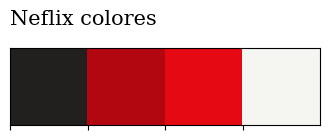

In [ ]:
# Paleta de colores de marca de Netflix
sns.palplot(['#221f1f', '#b20710', '#e50914', '#f5f5f1'])

# T√≠tulo con Matplotlib
plt.title("Neflix colores", loc='left', fontfamily='serif', fontsize=15, y=1.2)

# Mostrar gr√°fico
plt.show()

### a) Grafico circular: Seg√∫n el tipo

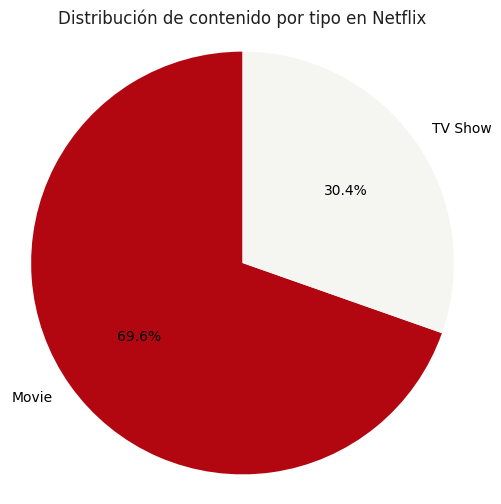

In [ ]:
# Contar ocurrencias de cada tipo
conteo_tipos = neflix['type'].value_counts()

# Gr√°fico circular
plt.figure(figsize=(6, 6))
plt.pie(
    conteo_tipos.values,
    labels=conteo_tipos.index,
    colors=['#b20710', '#f5f5f1'],
    autopct='%1.1f%%',
    startangle=90
)


plt.title('Distribuci√≥n de contenido por tipo en Netflix', color='#221f1f')
plt.axis('equal')
plt.show()

### b) Gr√°fico √°rea: Evolucion en el tiempo Contenido Agregado

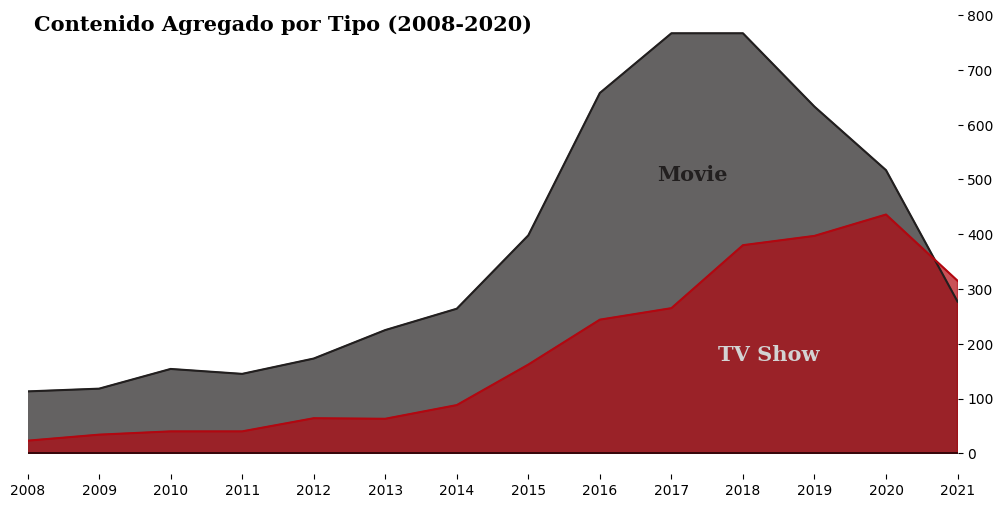

In [ ]:
# Obtener los tipos principales (pel√≠culas y series)
neflix_tipo = neflix['type'].value_counts().index[:2]

# Definir colores para cada tipo
colors = ["#221f1f", "#b20710"]

# Crear la figura y el eje
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Bucle para graficar cada tipo (Movie y TV Show)
for i, type in enumerate(neflix_tipo):

    # Contar cantidad por a√±o para ese tipo (release_year) -> value_counts()
    # sort_index() --> ordenar de formar cronologica
    country_data = neflix[neflix['type'] == type]['release_year'].value_counts().sort_index()

    # ax.plot --> Dibujar la linea del grafico
    ax.plot(country_data.index, country_data.values, color=colors[i], label=type)

    # ax.fill_between --> Rellena el √°rea debajo de la l√≠nea
    ax.fill_between(country_data.index, 0, country_data.values, color=colors[i], alpha=0.7)

# Poner el eje "Y" a la derecha
ax.yaxis.tick_right()

# L√≠nea horizontal base "X"
ax.axhline(y=0, color='black', linewidth=1.3, alpha=0.7)

# Quitar bordes del gr√°fico
for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_visible(False)

# Quitar la cuadr√≠cula
ax.grid(False)

# Ajustar l√≠mites X, por ejemplo desde 2008 hasta 2020
ax.set_xlim(2008, 2021)
plt.xticks(np.arange(2008, 2022, 1))

# Texto del t√≠tulo y explicaci√≥n
fig.text(0.13, 0.85, 'Contenido Agregado por Tipo (2008-2020)', fontsize=15, fontweight='bold', fontfamily='serif')

# Leyenda personalizada con colores
fig.text(0.65, 0.6, neflix_tipo[0], fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')
fig.text(0.70, 0.3, neflix_tipo[1], fontweight="bold", fontfamily='serif', fontsize=15, color='#d3d3d3')

plt.show()


In [ ]:
# Crear tabla tipo (Movie/TV Show) por a√±o
tabla_tipo = pd.crosstab(neflix['release_year'], neflix['type'])

# Ordenar por a√±o
tabla_contenido = tabla_tipo.sort_index()

# Mostrar la tabla
print(tabla_contenido)

type          Movie  TV Show
release_year                
1925              0        1
1942              2        0
1943              3        0
1944              3        0
1945              3        1
...             ...      ...
2017            767      265
2018            767      380
2019            633      397
2020            517      436
2021            277      315

[74 rows x 2 columns]


### c) Gr√°fico Barras: Los paises donde se produjo mayor contenido de Neflix

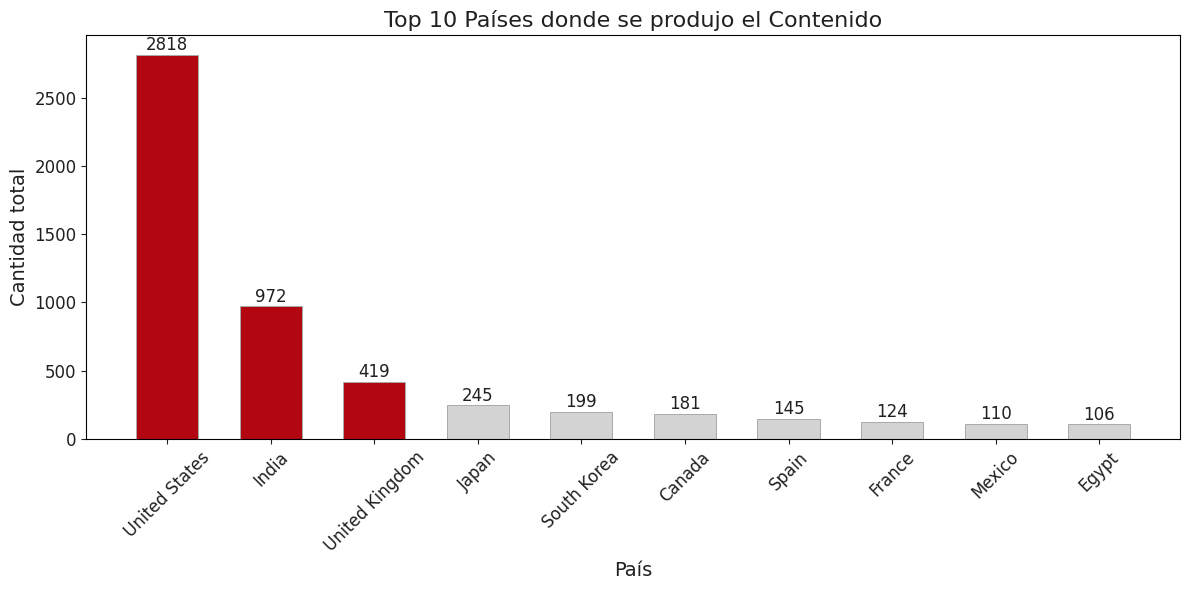

In [ ]:
# Eliminar registros con 'Desconocido' en la columna 'country'
neflix_country = neflix[neflix['country'] != 'Desconocido']

# Contar los 10 pa√≠ses m√°s frecuentes
pais = neflix_country['country'].value_counts().sort_values(ascending=False)[:10]

# Definir colores: primeros 3 en rojo oscuro, el resto en gris claro
color_map = ['#b20710' if i < 3 else '#d3d3d3' for i in range(len(pais))]

# Crear gr√°fico
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(pais.index, pais.values, width=0.6, edgecolor='darkgray', linewidth=0.7, color=color_map)

# Etiquetas con la cantidad encima de cada barra
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{int(height)}',
            ha='center', va='bottom', fontsize=12, color='#221f1f')

# Estabilizar
ax.set_title('Top 10 Pa√≠ses donde se produjo el Contenido', fontsize=16, color='#221f1f')
ax.set_xlabel('Pa√≠s', fontsize=14, color='#221f1f')
ax.set_ylabel('Cantidad total', fontsize=14, color='#221f1f')
ax.tick_params(axis='x', rotation=45, labelsize=12, colors='#221f1f')
ax.tick_params(axis='y', labelsize=12, colors='#221f1f')

plt.tight_layout()
plt.show()


### d) Gr√°fico Barras Horizontal: Las Series de acuerdo a la Categoria o genero

In [ ]:
# Filtrar solo las Series
series = neflix[neflix['type'] == 'TV Show']
top_series = series['listed_in'].value_counts().head(10)  # Top 10
top_series

listed_in
Kids' TV                                                  220
International TV Shows, TV Dramas                         121
Crime TV Shows, International TV Shows, TV Dramas         110
Kids' TV, TV Comedies                                      99
Reality TV                                                 95
International TV Shows, Romantic TV Shows, TV Comedies     94
International TV Shows, Romantic TV Shows, TV Dramas       90
Anime Series, International TV Shows                       88
Docuseries                                                 85
TV Comedies                                                69
Name: count, dtype: int64

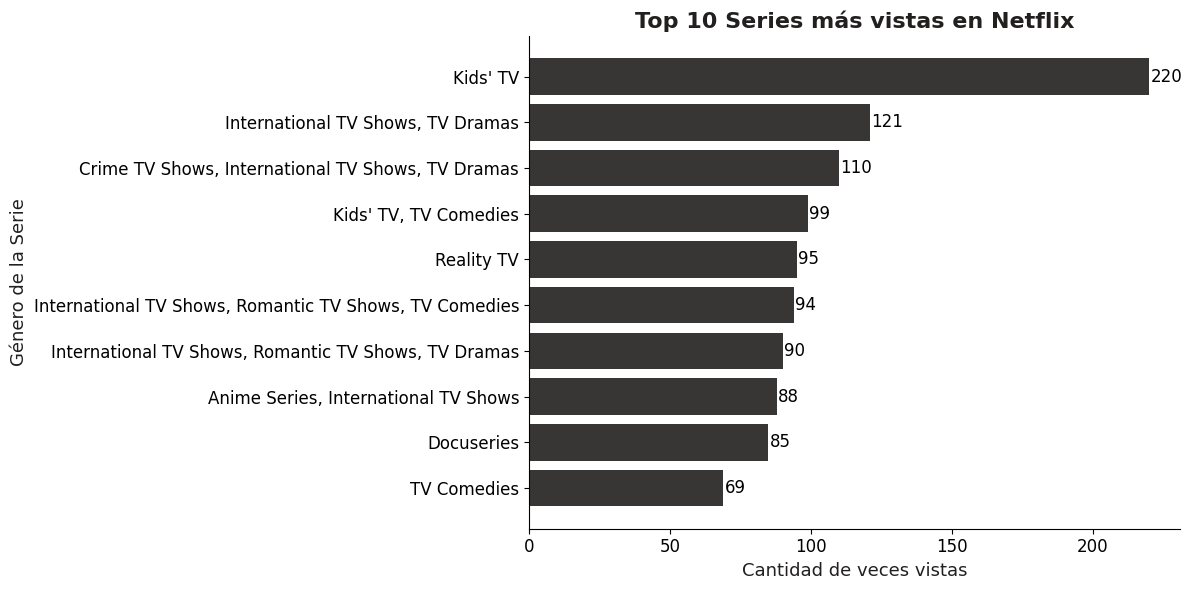

In [ ]:
# Crear gr√°fico
fig, ax = plt.subplots(figsize=(12, 6))

# Gr√°fico de barras horizontales
ax.barh(top_series.index[::-1], top_series.values[::-1], color='#221f1f', alpha=0.9)

# Etiquetas y estilo
ax.set_title('Top 10 Series m√°s vistas en Netflix', fontsize=16, fontweight='bold', color='#221f1f')
ax.set_xlabel('Cantidad de veces vistas', fontsize=13, color='#221f1f')
ax.set_ylabel('G√©nero de la Serie', fontsize=13, color='#221f1f')

# Mostrar los valores a la derecha de cada barra
for i, v in enumerate(top_series.values[::-1]):
    ax.text(v + 0.5, i, str(v), color='black', va='center', fontsize=12)

# Estilo del gr√°fico
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()


### e) Gr√°fico Barras Horizontal: Las Peliculas de acuerdo a la Categoria o genero

In [ ]:
# Filtrar solo las Peliculas
peliculas = neflix[neflix['type'] == 'Movie']

top_peliculas =peliculas['listed_in'].value_counts().head(10)  # Top 10
top_peliculas

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Comedies, International Movies                      176
Name: count, dtype: int64

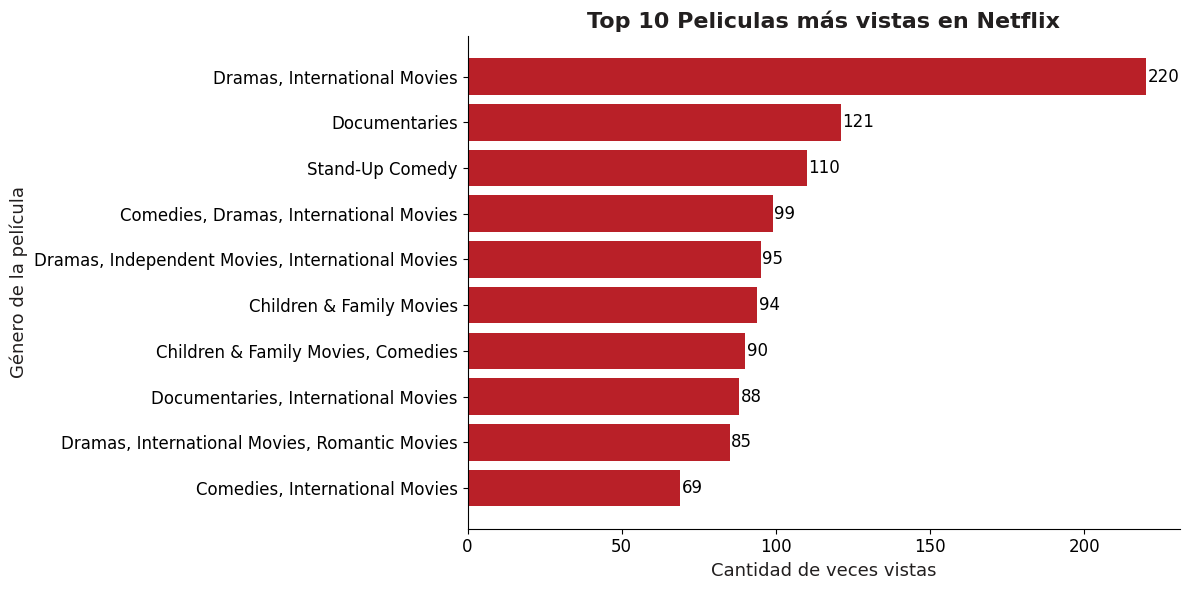

In [ ]:

# Gr√°fico de barras horizontales
fig, ax = plt.subplots(figsize=(12, 6))

# Gr√°fico de barras horizontales
ax.barh(top_peliculas.index[::-1], top_series.values[::-1], color='#b20710', alpha=0.9)

# Etiquetas y estilo
ax.set_title('Top 10 Peliculas m√°s vistas en Netflix', fontsize=16, fontweight='bold', color='#221f1f')
ax.set_xlabel('Cantidad de veces vistas', fontsize=13, color='#221f1f')
ax.set_ylabel('G√©nero de la pel√≠cula', fontsize=13, color='#221f1f')

# Mostrar los valores a la derecha de cada barra
for i, v in enumerate(top_series.values[::-1]):
    ax.text(v + 0.5, i, str(v), color='black', va='center', fontsize=12)

# Estilo del gr√°fico
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()


### f) Gr√°fico treemap: Las Temporadas m√°s frecuentes

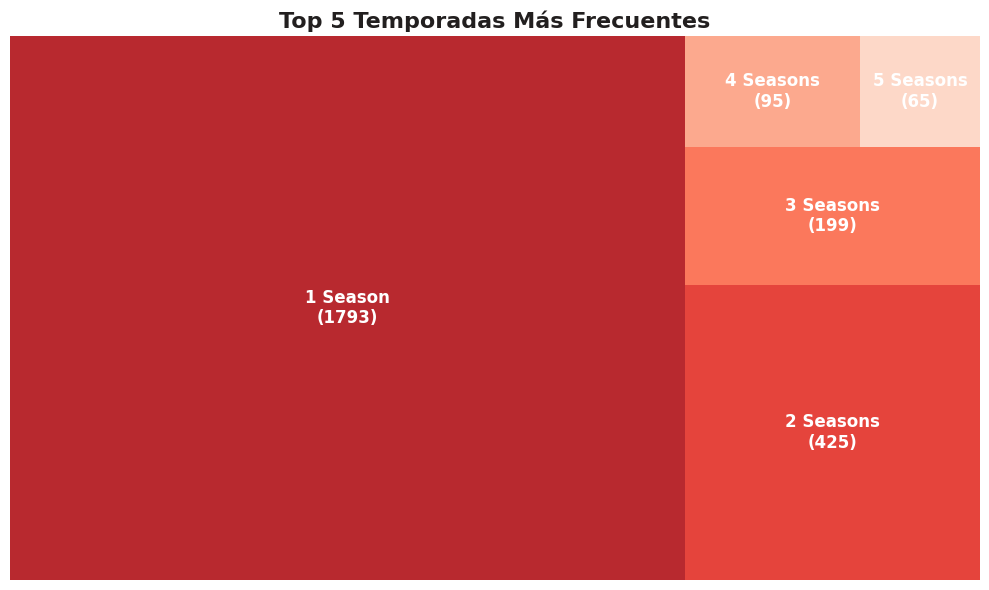

In [ ]:
# Filtrar solo TV Shows con duraci√≥n v√°lida
temporadas = neflix[(neflix['type'] == 'TV Show') & (neflix['duration'].str.contains('Season'))]
# primero filtar solo TV shows
# .str.contains('Season') --> Contiene el texto "Season" (puede ser "Season" o "Seasons")
# 1 Season, 2 Seasons, 3 Seasons --> entonces asi se considera los dos tipos

# Contar temporadas m√°s frecuentes
season_counts = temporadas['duration'].value_counts().sort_values(ascending=False).head(5)
#.sort_values(ascending=False)--> ordenar de mayor a menor
# head(5) --> 5 primeros

# Crear un degradado de color
palette = sns.color_palette("Reds", len(season_counts)).as_hex()

# Crear gr√°fico treemap
plt.figure(figsize=(10, 6))
squarify.plot(
    sizes=season_counts.values, #sizes = tama√±o -> conteo
    #etiquetas dentro del rectangulo
    label=[f"{label}\n({count})" for label, count in zip(season_counts.index, season_counts.values)],
    color=palette[::-1],  # Invertir los colores para que el m√°s fuerte sea primero
    alpha=0.9, # transparencia
    text_kwargs={'fontsize': 12, 'weight': 'bold', 'color': 'white'}
) # fontsise -> tama√±o ==== weight -> negrita ==== color -> letra

# T√≠tulo y limpieza
plt.title('Top 5 Temporadas M√°s Frecuentes', fontsize=16, fontweight='bold', color='#221f1f')
# fontsize tama√±o de la fuente
plt.axis('off') # desactivar el eje de los graficos
plt.tight_layout()
plt.show()

### g) Gr√°fico treemap: Las Peliculas por Minutos m√°s frecuentes

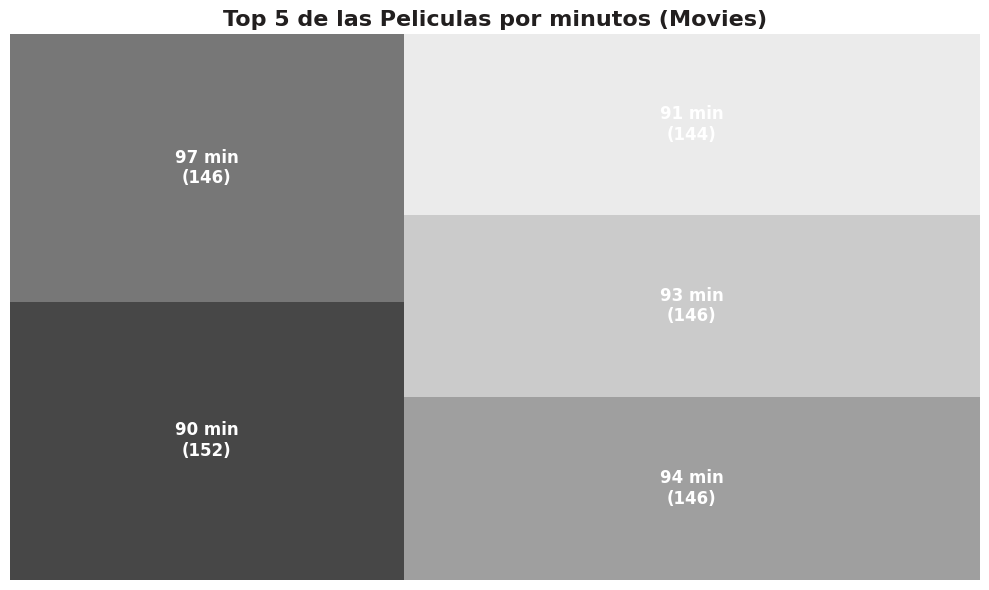

In [ ]:
# Filtrar solo por Peliculas con respectiva a la duracion
minutos = neflix[(neflix['type'] == 'Movie') & (neflix['duration'].str.contains('min'))]

# Contar duracion de minutos mas frecuentes
contar = minutos["duration"].value_counts().sort_values(ascending=False).head(5)

# Crear una paleta de colores
palette = sns.color_palette("Greys", len(contar)).as_hex()

# Crear gr√°fico treemap
plt.figure(figsize=(10, 6))
squarify.plot(
    sizes=contar.values,
    label=[f"{label}\n({count})" for label, count in zip(contar.index, contar.values)],
    color=palette[::-1],
    alpha=0.9,
    text_kwargs={'fontsize': 12, 'weight': 'bold', 'color': 'white'}
)

# T√≠tulo y limpieza
plt.title('Top 5 de las Peliculas por minutos (Movies)', fontsize=16, fontweight='bold', color='#221f1f')
plt.axis('off')
plt.tight_layout()
plt.show()

# ‚úÖ 5. Conclusiones

## **Predominio de las pel√≠culas en la plataforma**
### El tipo de contenido m√°s frecuente en Netflix son las pel√≠culas, las cuales representan el 69.6% del total. Esto demuestra una clara preferencia y mayor relevancia de este formato en comparaci√≥n con los programas de televisi√≥n.

## **Evoluci√≥n temporal del contenido**
### Tanto las pel√≠culas como los programas de televisi√≥n experimentaron un crecimiento sostenido desde 2008 hasta 2019. Sin embargo, en los a√±os 2020 y 2021 se observ√≥ una disminuci√≥n en la incorporaci√≥n de nuevos t√≠tulos, debido a las dificultades en los rodajes provocadas por la pandemia de COVID-19.

##**Pa√≠ses con mayor presencia de contenido**
### Estados Unidos lidera la producci√≥n de contenido disponible en Netflix, con 2,818 t√≠tulos, lo que refleja su papel predominante en el mercado audiovisual de la plataforma. Le siguen India (972 t√≠tulos) y el Reino Unido (419 t√≠tulos), aunque con una participaci√≥n considerablemente menor.

## **G√©neros m√°s relevantes en programas de TV**
### El g√©nero m√°s destacado dentro de los programas de televisi√≥n es el de contenido infantil ("Kids"), con un total de 220 t√≠tulos. Esto indica una alta demanda por parte del p√∫blico infantil y juvenil. Adem√°s, se observa que la mayor√≠a de estos programas cuentan con solo una temporada.

## **G√©neros m√°s destacados en pel√≠culas**
### En el caso de las pel√≠culas, el g√©nero con mayor presencia es el drama internacional, con 220 t√≠tulos, seguido por los documentales (121) y las comedias (110). En cuanto a la duraci√≥n, la mayor√≠a de las pel√≠culas oscila entre los 90 y 97 minutos.

## **Tendencias generales de la plataforma**
### En resumen, el an√°lisis exploratorio de los datos de Netflix hasta 2021 evidencia una tendencia clara hacia el predominio de las pel√≠culas, una evoluci√≥n significativa en la oferta de contenido a lo largo del tiempo, y patrones definidos en cuanto a g√©neros y duraci√≥n. Estos hallazgos permiten comprender mejor la estrategia de contenido de la plataforma y las preferencias de su audiencia.